<a href="https://colab.research.google.com/github/mateuszGrabiec/175-IC-machine-lerning/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import statsmodels.api as sm
from sys import getsizeof
np.random.seed(2137)

#Wczytywanie danych
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df = df_raw.copy()
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [30]:
#Usunięcie duplikatów
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

no     1063
yes     274
Name: smoker, dtype: int64


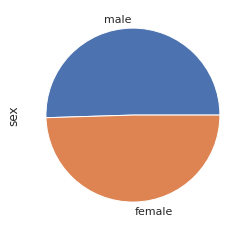

In [31]:
#Wykresy zależności wysokości opłat od palenia papierosów przy podziale na płeć
print(df.smoker.value_counts())

df.sex.value_counts().plot(kind='pie')
px.histogram(df,x='charges',width=800,height=600,nbins=50,facet_col='smoker',facet_row='sex')

In [32]:
#Get dummies
df_dummies = pd.get_dummies(df,drop_first=True)
corr = df_dummies.corr()

print(df_dummies.head(10))
print(corr)

   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0
5   31  25.740         0  ...                 0                 1                 0
6   46  33.440         1  ...                 0                 1                 0
7   37  27.740         3  ...                 1                 0                 0
8   37  29.830         2  ...                 0                 0                 0
9   60  25.840         0  ...                 1                 0                 0

[10 rows x 9 columns]
                       age       bmi  ...  region_sou

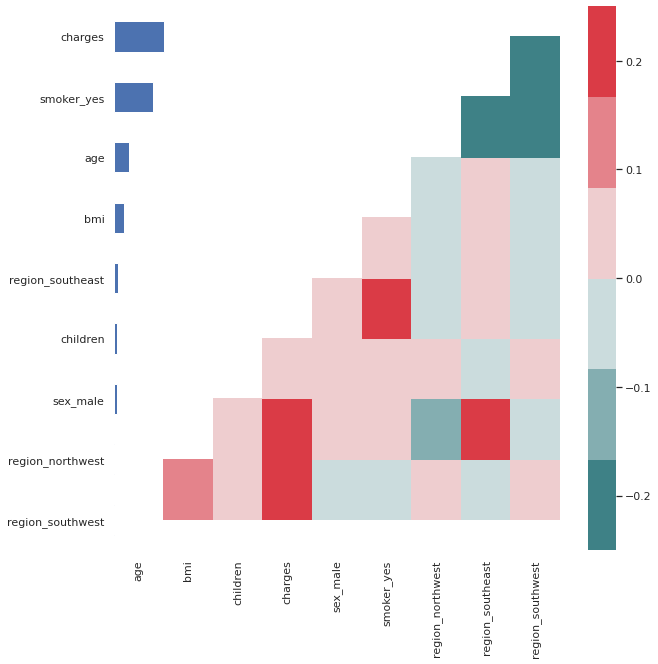

In [33]:

#Mapa ciepła
sns.set(style='white')
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)]=1
plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,10)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.25,vmin=-0.25)

df_dummies.corr()['charges'].sort_values().plot(kind='barh')

In [34]:
#Wypisaanie danych tekstowyo i podzielenie ich
output = df_dummies['charges']
input = df_dummies.drop(columns='charges')

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(input,output,test_size=0.2)

print(x_train)
print(y_train)

      age     bmi  ...  region_southeast  region_southwest
710    18  35.200  ...                 1                 0
1160   43  34.580  ...                 0                 0
804    23  26.510  ...                 1                 0
387    50  25.365  ...                 0                 0
718    51  36.670  ...                 0                 0
...   ...     ...  ...               ...               ...
80     31  26.885  ...                 0                 0
973    19  40.500  ...                 0                 1
686    42  26.125  ...                 0                 0
1302   25  20.800  ...                 0                 1
1121   46  38.170  ...                 1                 0

[1069 rows x 8 columns]
710      1727.54000
1160     7727.25320
804      1815.87590
387     30284.64294
718     10848.13430
           ...     
80       4441.21315
973      1759.33800
686      7729.64575
1302     3208.78700
1121     8347.16430
Name: charges, Length: 1069, dtype: float64


In [35]:
#Dokładnośc regresji
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train,y_train)
r2=regressor.score(x_test,y_test)
print(f'R2 score: {regressor.score(x_test,y_test):.4f}')

R2 score: 0.7587


         y_true        y_pred        error
609  39241.4420  31446.133826  7795.308174
920  13451.1220  12050.941029  1400.180971
730  19361.9988  28753.145437 -9391.146637
400   9264.7970   7755.722965  1509.074035
43    6313.7590   7700.193017 -1386.434017


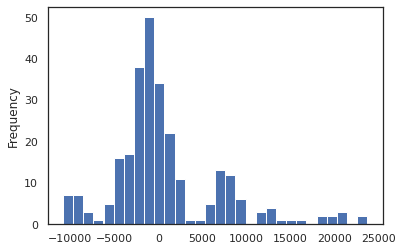

In [36]:
#histogram błędów
y_pred = regressor.predict(x_test)
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true':y_true,'y_pred':y_pred})
predictions['error'] = predictions.y_true - predictions.y_pred

print(predictions.head())

predictions.error.plot(kind='hist',bins=30)

In [37]:
#Błąd średni
mae = sklearn.metrics.mean_absolute_error(y_true,y_pred)

print(f'Maei wynosi: {mae:.2f}')

Maei wynosi: 4169.45


In [38]:
#Podsumowanie tabela
x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train,exog=x_train_ols).fit()
predictors = ['const'] + list(x_train.columns)

print(ols.summary(xname= predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          2.80e-310
Time:                        17:55:01   Log-Likelihood:                -10819.
No. Observations:                1069   AIC:                         2.166e+04
Df Residuals:                    1060   BIC:                         2.170e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.145e+04   1102.497  

In [39]:
#Usuwanięcie zbędnych kolumn
df_without_cols = df_dummies.drop(columns=['children','sex_male','region_northwest','region_southeast','region_southeast'])
df_without_cols.head()

,age,bmi,charges,smoker_yes,region_southwest
0,19,27.900,16884.92400,1,1
1,18,33.770,1725.55230,0,0
2,28,33.000,4449.46200,0,0
3,33,22.705,21984.47061,0,0
4,32,28.880,3866.85520,0,0


In [40]:
#Regresja na wyczyszczonych
output = df_without_cols['charges']
input = df_without_cols.drop(columns='charges')
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(input,output,test_size=0.2)
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train,y_train)

print(f'R2 score : {regressor.score(x_test,y_test)}')

y_pred = regressor.predict(x_test)
y_true = y_test.copy()

print(f'Mae:  {sklearn.metrics.mean_absolute_error(y_true,y_pred)}')

R2 score : 0.7730587370831377
Mae:  3970.8951535042497


In [41]:
#Porównanie błędu średniego
raw_size = getsizeof(df_dummies)
cols_size = getsizeof(df_without_cols)
print(f'Różnica po usunięciu zbędnych danych wynosi: {100-(cols_size/raw_size*100):.4f} procent')
print(f'Różnica R2 score {(r2-regressor.score(x_test,y_test)):.4f}')
print(f'Różnica Mae: {(mae-sklearn.metrics.mean_absolute_error(y_true,y_pred)):.4f}')

Różnica po usunięciu zbędnych danych wynosi: 24.4347 procent
Różnica R2 score -0.0144
Różnica Mae: 198.5595
